# Natural Language Processing

## Importing the libraries

In [ ]:
%config NotebookApp.iopub_data_rate_limit = 1000000000.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/ANN_text_3years_actualpseudo.csv')



In [ ]:
dataset['month_year'] = dataset['month_year'].str.replace('-', '.')

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset)):
  cons = re.sub('[^a-zA-Z]', ' ', dataset['cons'][i])
  cons = cons.lower()
  cons =cons.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  cons = [ps.stem(word) for word in cons if not word in set(all_stopwords)]
  cons = ' '.join(cons)
  corpus.append(cons)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Assuming the dataset variable contains the DataFrame
corpus = []
for i in range(0, len(dataset)):
    pros = re.sub('[^a-zA-Z]', ' ', str(dataset['pros'][i]))
    cons = re.sub('[^a-zA-Z]', ' ', str(dataset['cons'][i]))
    feedback = re.sub('[^a-zA-Z]', ' ', str(dataset['feedback'][i]))
    date = str(dataset['month_year'][i])

    pros = pros.lower().split()
    cons = cons.lower().split()
    feedback = feedback.lower().split()

    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    pros = [ps.stem(word) for word in pros if not word in set(all_stopwords)]
    cons = [ps.stem(word) for word in cons if not word in set(all_stopwords)]
    feedback = [ps.stem(word) for word in feedback if not word in set(all_stopwords)]

    pros = ' '.join(pros)
    cons = ' '.join(cons)
    feedback = ' '.join(feedback)
o
    corpus.append([pros, cons, feedback,date])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus[1])

['amr low expect work perform time commit', 'reward high perform commit', 'leadership must lead not manag accord colan powel time charg mean piss peopl', '2008.06']


## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
corpus_str = [' '.join(text) for text in corpus]
X = cv.fit_transform(corpus_str).toarray()
#X = cv.fit_transform(corpus).toarray()

y = dataset.iloc[:, 4].values

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
print("Number of NaN values in X:", np.isnan(X).sum())
print("Number of NaN values in y:", np.isnan(y).sum())


Number of NaN values in X: 0
Number of NaN values in y: 0


In [ ]:
print("X:", X)
print("y:", y)


X: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y: [1 1 1 ... 0 0 0]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.20, random_state = 0)

Training SVM model


## Training the Catboost model on the Training set

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
classifier = CatBoostClassifier()

# Fit the classifier on the resampled data
classifier.fit(X_train1, y_train1)

# Make predictions on the test set
y_predcat = classifier.predict(X_test1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test1, y_predcat)
print(cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test1, y_predcat)
print("Accuracy:", accuracy)

# Perform cross-validation
accuracies = cross_val_score(estimator=classifier, X=X_train1, y=y_train1, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6687351	total: 225ms	remaining: 31.8s
7:	learn: 0.6656675	total: 255ms	remaining: 31.6s
8:	learn: 0.6628443	total: 290ms	remaining: 31.9s
9:	learn: 0.6601009	total: 321ms	remaining: 31.8s
10:	learn: 0.6570218	total: 352ms	remaining: 31.6s
11:	learn: 0.6544441	total: 383ms	remaining: 31.6s
12:	learn: 0.6520345	total: 425ms	remaining: 32.3s
13:	learn: 0.6505053	total: 455ms	remaining: 32s
14:	learn: 0.6488186	total: 484ms	remaining: 31.8s
15:	learn: 0.6463799	total: 517ms	remaining: 31.8s
16:	learn: 0.6449503	total: 559ms	remaining: 32.4s
17:	learn: 0.6431384	total: 587ms	remaining: 32s
18:	learn: 0.6414728	total: 615ms	remaining: 31.8s
19:	learn: 0.6387791	total: 656ms	remaining: 32.1s
20:	learn: 0.6377189	total: 686ms	remaining: 32s
21:	learn: 0.6365238	total: 714ms	remaining: 31.7s
22:	learn: 0.6347762	total: 744ms	remaining: 31.6s
23:	learn: 0.6337673	total: 773ms	remaining: 31.5s
24:	learn: 0.6325987	total: 803ms	remaini

In [ ]:
print(y_predcat)

[1 0 1 ... 1 1 0]


In [ ]:
import pandas as pd
results_df = pd.DataFrame({
    'Actual': y_test1,
    'Predicted_Prob': y_predcat,
    'Predicted_Class': y_predcat.round()
})
print(results_df)
results_df.to_excel('model2_results.xlsx', index=False)

      Actual  Predicted_Prob  Predicted_Class
0          1               1                1
1          0               0                0
2          1               1                1
3          1               1                1
4          0               0                0
...      ...             ...              ...
2793       1               1                1
2794       0               0                0
2795       1               1                1
2796       0               1                1
2797       0               0                0

[2798 rows x 3 columns]


                 Metric  Value
0   True Negatives (TN)    862
1  False Positives (FP)    478
2  False Negatives (FN)    343
3   True Positives (TP)   1115
Accuracy: 0.7065761258041459


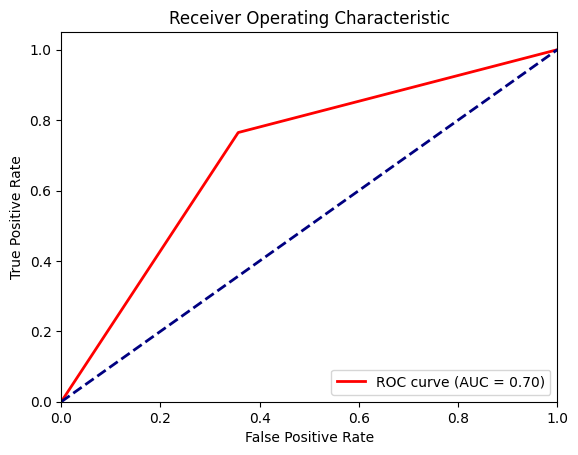

In [ ]:
from sklearn.metrics import roc_curve, auc
# Calculate the confusion matrix
cm = confusion_matrix(y_test1, y_predcat.round())
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Create a DataFrame to tabulate the values
results_df = pd.DataFrame({
    'Metric': ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)'],
    'Value': [TN, FP, FN, TP]
})

# Display the tabulated values
print(results_df)

# Calculate the accuracy
accuracy = accuracy_score(y_test1, y_predcat.round())
print("Accuracy:", accuracy)

# Calculate the false positive rate (FPR), true positive rate (TPR), and threshold
fpr, tpr, thresholds = roc_curve(y_test1, y_predcat)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



                 Metric  Value
0   True Negatives (TN)    862
1  False Positives (FP)    478
2  False Negatives (FN)    343
3   True Positives (TP)   1115


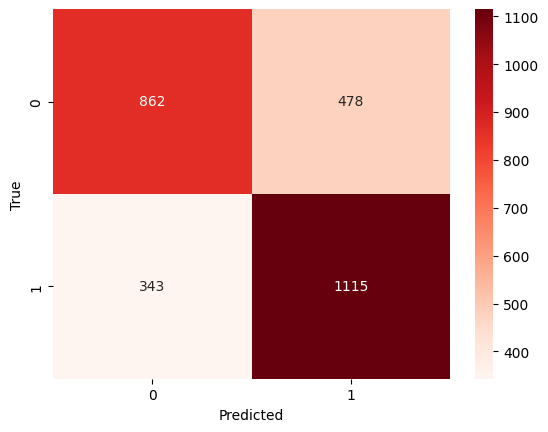

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test1 and y_predcat are already defined
# Replace this with your actual data

# Calculate confusion matrix
cm = confusion_matrix(y_test1, y_predcat)

# Extract TN, FP, FN, TP from confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Create a DataFrame to display the metrics
results_df = pd.DataFrame({
    'Metric': ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)'],
    'Value': [TN, FP, FN, TP]
})

print(results_df)

# Plot heatmap with numerical values
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Ratings file of 3** **years**

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import mglearn

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.tree import export_graphviz
import graphviz
from sklearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras import layers
from tensorflow.keras.utils import plot_model


In [ ]:
!pip install tensorflow

In [ ]:
# Load the dataset from a CSV file
df = pd.read_csv('/content/ANN_ratings_3years_actualpseudo.csv')

In [ ]:
# Convert 'month_year' to datetime objects
df['month_year'] = pd.to_datetime(df['month_year'])


In [ ]:
df = df.select_dtypes(include=["number"])

In [ ]:
# Fill missing values with column means
dataset = df.fillna(df.mean())


In [ ]:
#Removing Outliers
import numpy as np
import pandas as pd
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    print('Before dropping outliers: ', df.shape)
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, axis=0) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    print('After dropping outliers: ', df.shape)

# Assuming you have a DataFrame named 'dataset'
drop_numerical_outliers(dataset, z_thresh=3)

Before dropping outliers:  (13988, 10)
After dropping outliers:  (13722, 10)


In [ ]:
"""
Need to split train test sets before upsampling
We only upsample train set

def upsampling_minority(X, y):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

    print('Before upsampling: training data shape', X_train.shape, 'test data shape', X_test.shape)
    print("Unbalanced training data{}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))

    sm = SMOTE(random_state=10)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    print('Finished upsampling: training data shape', X_train.shape, 'test data shape', X_test.shape)
    print("Balanced training data {}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))

    return X_train, X_test, y_train, y_test

In [ ]:
def upsampling_minority(X, y):
    # setting up testing and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

    print('Before upsampling: training data shape', X_train.shape, 'test data shape', X_test.shape)
    print("Unbalanced training data{}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))

    # Convert target variable to categorical
    y_train = y_train.astype('int64')

    sm = SMOTE(random_state=10)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    print('Finished upsampling: training data shape', X_train.shape, 'test data shape', X_test.shape)
    print("Balanced training data {}".format({n: v for n, v in zip(['Not Bankrupt', 'Bankrupt'], np.bincount(y_train))}))

    return X_train, X_test, y_train, y_test

In [ ]:
"""
Sampling
"""
drop_numerical_outliers(dataset)
X = dataset.iloc[:, 6:13].values
y = dataset.iloc[:, 4].values
X_train2, X_test2, y_train2, y_test2 = upsampling_minority(X, y)

Before dropping outliers:  (13512, 10)
After dropping outliers:  (13512, 10)
Before upsampling: training data shape (10134, 4) test data shape (3378, 4)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [ ]:
#models
from sklearn.metrics import accuracy_score

# Your existing imports...

def MyModel(X_train2, y_train2, show_plots=True, score_method='recall'):
    """
    Support Vector Machine
    """
    params_svc = [{'svc__kernel' : ['rbf'],
             'svc__gamma' : [0.01, 0.1, 1, 10, 100],
             'svc__C' : [0.01, 0.1, 1, 10, 100]},
             {'svc__kernel' : ['linear'],
             'svc__C' : [0.01, 0.1, 1, 10, 100]}]
    pipe_svc = make_pipeline(MinMaxScaler(), SVC())
    ssearch = GridSearchCV(estimator=pipe_svc,
                           scoring='recall',
                           param_grid=params_svc,
                           cv=5,
                           n_jobs=-1)
    ssearch.fit(X_train2, y_train2)
    svc = ssearch.best_estimator_
    y_pred_svc = svc.predict(X_train2)
    accuracy_svc = accuracy_score(y_train2, y_pred_svc)
    print('Accuracy of Support Vector Machine:', accuracy_svc)
    print('Finished training Support Vector Machine...')

    # Return models and accuracies
    return {'SupportVectorMachine': (svc, accuracy_svc)}

# Example usage
models_and_accuracies = MyModel(X_train2, y_train2)
print("Accuracies after MyModel:")
for model_name, (model, accuracy) in models_and_accuracies.items():
    print(f"{model_name}: {accuracy}")


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your trained classifier
y_score = model.decision_function(X_test2)  # Use decision function values

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test2, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Make predictions on the test set
y_predss = model.predict(X_test2)

# Calculate confusion matrix
cm = confusion_matrix(y_test2, y_predss)

# Plot confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

## ensemble **model**

In [ ]:
print(y_test2)

In [ ]:
# Trim y_predss to match the length of y_predcat
y_predss1 = y_predss[:len(y_predcat)]

# Check the shape of y_predss_trimmed
print("Shape of y_predss1:", y_predss1.shape)


In [ ]:
# Trim X_test2 to match the length of y_predcat and y_predss1
X_test21 = X_test2[:len(y_predss1)]

# Combine predictions from both models with original features from the test datasets
combined_test_data = np.column_stack((y_predcat, y_predss1, X_test1, X_test21))


In [ ]:


# Split the combined data into train and validation sets for blending
X_blend_train, X_blend_val, y_blend_train, y_blend_val = train_test_split(combined_test_data, y_test1, test_size=0.2, random_state=42)

# Train a meta-model (e.g., Logistic Regression) on the blended data
meta_model = LogisticRegression()
meta_model.fit(X_blend_train, y_blend_train)

# Validate the meta-model
blend_preds_val = meta_model.predict(X_blend_val)
blend_accuracy_val = accuracy_score(y_blend_val, blend_preds_val)
print("Blend Accuracy (Validation):", blend_accuracy_val)

# Use the validated meta-model to make final predictions on the test data
blend_preds_test = meta_model.predict(combined_test_data)
blend_accuracy_test = accuracy_score(y_test1, blend_preds_test)
print("Blend Accuracy (Test):", blend_accuracy_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, blend_preds_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve in red
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')  # Adjust linestyle to red as well
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test1, blend_preds_test)

# Plot the heatmap of the confusion matrix in red
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')  # Set cmap to Reds for red color
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()